In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import os

##
from matplotlib.colors import LinearSegmentedColormap

#from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [ ]:
plt.style.use('default')
#plt.style.use('fivethirtyeight')
#plt.style.use('bmh')

In [ ]:
df = pd.read_csv("../data/clean/aggregate_df.csv")

df_customers = pd.read_csv("../data/clean/customers.csv")
df_orders = pd.read_csv("../data/clean/orders.csv")
df_items = pd.read_csv("../data/clean/order_items.csv")
df_products = pd.read_csv("../data/clean/products.csv")

In [ ]:
### reload

#df_orders = pd.read_csv("../data/clean/orders.csv")
#df = pd.read_csv("../data/clean/aggregate_df.csv")

In [ ]:
print("=== MAIN DF ===")
df.info()
print("\n=== CUSTOMERS ===")
df_customers.info()
print("\n=== ORDERS ===")
df_orders.info()
print("\n=== ORDER ITEMS ===")
df_items.info()
print("\n=== PRODUCTS ===")
df_products.info()

In [ ]:
df.head(10)

In [ ]:
# overview of the dataframe
    
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


In [ ]:
### ---  Column structuring --- 

id_list = ['Customers.id', 'Orders.id', 'Orders.customer_id', 'Orders.order_number', 'Orders.reorder_id',
           'Orders.coupon_id', 'Orders.reorder_id',
          'Order_Items.id', 'Order_Items.parent', 'Order_Items.product_id', 
          'Products.id',  'Products.import_id', 'Products.family_id'
        ]		


text_list = ['Customers.fname', 'Customers.lname', 'Customers.company', 
            'Orders.company', 'Orders.discount_name', 'Orders.shipping_method', 
            'Order_Items.product_name', 
            'Products.shopping_color'
            ]

integer_list = ['Customers.mailing', 'Order_Items.qty']


category_list = ['Orders.shipping_carrier', 'Orders.shipping_method', 'Orders.discount_name',
                'Orders.payment_method', 'Orders.payment_status', 'Orders.status', 
                'Products.status', 'Products.vendor', 'Products.shopping_brand', 'Products.taxable'
                ]



In [ ]:
dfs = [df, df_orders, df_customers, df_items, df_products]

for data in dfs:
    for col in id_list:
        if col in data.columns:
            data[col] = data[col].astype("object")

    for col in category_list:
        if col in data.columns:
            data[col] = data[col].astype("category")

    for col in integer_list:
        if col in data.columns:
            data[col] = data[col].astype("int64")


In [ ]:
## ---  Check unique counts: FLAGs ---

df.nunique()[ (df.nunique() > 1) & (df.nunique() < 8) ]


In [ ]:
# check vendor unique values

df['Orders.status'].unique()


In [ ]:
### update order status values
  #повторно НЕ виконувати

# order_status_map = {
#     1:  "Completed",
#     0:  "Pending",
#     3:  "Shipped",
#     4:  "Cancelled",
#     5:  "Refunded",
#     8:  "Error",
#     12: "On Hold",
#     14: "Validation Required",
#     15: "Unknown"
# }

# df_orders['Orders.status'] = df_orders['Orders.status'].map(order_status_map)
# df['Orders.status'] = df['Orders.status'].map(order_status_map)
# # відсутні без мапи:
# df_orders['Orders.status'] = df_orders['Orders.status'].fillna("Unknown")
# df['Orders.status'] = df['Orders.status'].fillna("Unknown")

In [ ]:
df_orders['Orders.status'].value_counts(dropna=False)

In [ ]:
#df_orders['Orders.status'] = df_orders['Orders.status'].fillna("Unknown")

In [ ]:
#df_orders['Orders.payment_status'].value_counts(dropna=False) 
  #повторно НЕ виконувати

# payment_status_map = {
#     3.0: "Paid",
#     1.0: "Pending",
#     0.0: "Unpaid"
# }

# df_orders['Orders.payment_status'] = df_orders['Orders.payment_status'].map(payment_status_map).fillna("Unknown")
# df['Orders.payment_status'] = df['Orders.payment_status'].map(payment_status_map).fillna("Unknown")

In [ ]:
df_orders['Orders.payment_status'].value_counts(dropna=False)

In [ ]:
#df_products['Products.status'].value_counts(dropna=False)  #повторно НЕ виконувати

# product_status_map = {
#     0.0: "Active",
#     3.0: "Discontinued",
#     2.0: "Out of Stock",
#     1.0: "New",
#     5.0: "Archived"
# }

# #df_products['Products.status'] = (
# #    df_products['Products.status']
# #    .map(product_status_map)
# #    .fillna("Unknown")
# #)

# df['Products.status'] = (
#     df['Products.status']
#     .map(product_status_map)
#     .fillna("Unknown")
# )

In [ ]:
df['Products.status'].value_counts(dropna=False)

In [ ]:
# df['Products.taxable'] = df['Products.taxable'].fillna(2)
# mapping = {
#     1: "taxable",
#     0: "not taxable",
#     2: "unknown"
# }

# df['Products.taxable'] = df['Products.taxable'].map(mapping)
# #df_products['Products.taxable'] = df_products['Products.taxable'].map(mapping)

In [ ]:
df['Products.taxable'].value_counts(dropna=False)

In [ ]:
backup_df = df.copy()
backup_df_orders = df_orders.copy()
backup_df_customers = df_customers.copy()
backup_df_items = df_items.copy()
backup_df_products = df_products.copy()

In [ ]:
#df = backup_df
#df_orders = backup_df_orders
########################################################################################

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)
corr = df.corr(numeric_only=True)

sns.heatmap(corr, 
            cmap="coolwarm",
            center=0,
            annot=False)

plt.show()

* * *

### **CUSTOMER**

In [214]:
print("Customers: ", df_customers['Customers.id'].nunique())

business_customers = (df_customers['Customers.company'] != "Individual").sum()
print("Business Customers:", business_customers)

business_company = df_customers['Customers.company'].nunique() - 1 # ohne Individual
print("Business Company: ", business_company)

individual_customers = (df_customers['Customers.company'] == "Individual").sum()
print("Individual Customers:", individual_customers) 

Customers:  3054
Business Customers: 464
Business Company:  428
Individual Customers: 2590


C:\Users\Anna\AppData\Local\Temp\ipykernel_13720\2888886542.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


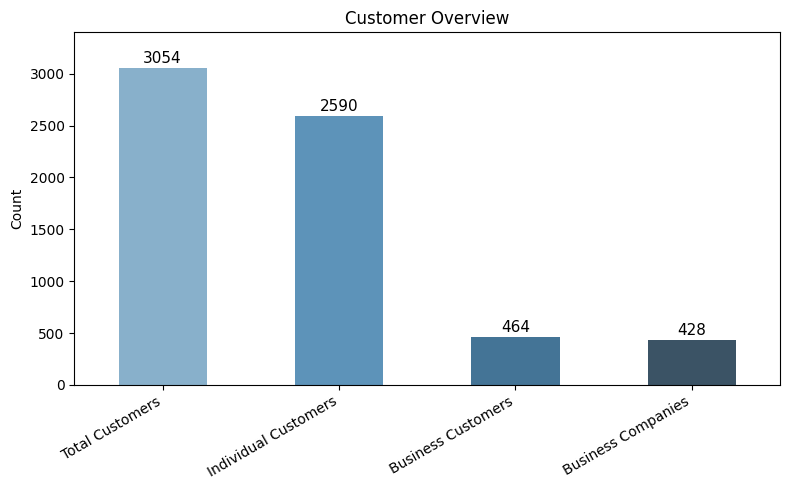

In [215]:
metrics = {
    "Total Customers": df_customers['Customers.id'].nunique(),
    "Business Customers": (df_customers['Customers.company'] != "Individual").sum(),
    "Business Companies": df_customers['Customers.company'].nunique() - 1,
    "Individual Customers": (df_customers['Customers.company'] == "Individual").sum()
}

df_metrics = pd.DataFrame(list(metrics.items()), columns=["Category", "Count"])

# Desired order
order = [
    "Total Customers",
    "Individual Customers",
    "Business Customers",
    "Business Companies"
]

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_metrics,
    x="Category",
    y="Count",
    width=0.5,
    palette="Blues_d",
    order=order
)

# Add labels
for index, row in df_metrics.set_index("Category").loc[order].iterrows():
    plt.text(order.index(index), row["Count"] + 50, str(row["Count"]),
             ha='center', fontsize=11)

plt.ylim(0, 3400)
plt.title("Customer Overview")
plt.ylabel("Count")
plt.xlabel("")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [216]:
df['is_individual'] = df['Customers.company'] == "Individual"
df['is_business'] = df['Customers.company'] != "Individual"

individual_revenue = df[df['is_individual']]['Orders.total'].sum()
business_revenue = df[df['is_business']]['Orders.total'].sum()

print("Individual revenue:", individual_revenue, "USD")
print("Business revenue:", business_revenue, "USD")

# !ohne unique Order

Individual revenue: 411659.19 USD
Business revenue: 163727.49 USD


In [217]:
total_revenue = df['Orders.total'].sum()

print("Individual share:", round((individual_revenue / total_revenue * 100),2), "%")
print("Business share:", round((business_revenue / total_revenue * 100),2), "%")

Individual share: 71.54 %
Business share: 28.46 %


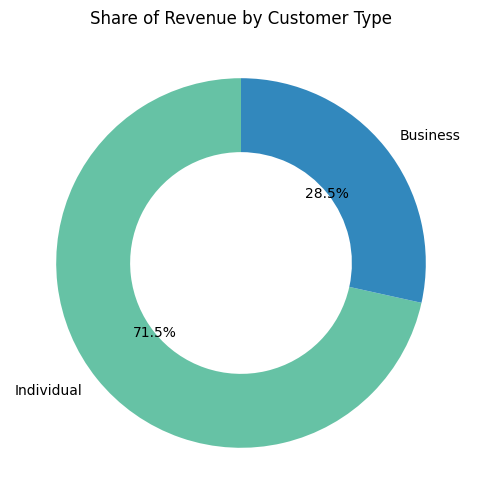

In [218]:
sizes = [individual_revenue, business_revenue]
labels = ["Individual", "Business"]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=["#66c2a5", "#3288bd"], wedgeprops={'width':0.4})

plt.title("Share of Revenue by Customer Type")
plt.show()

C:\Users\Anna\AppData\Local\Temp\ipykernel_13720\1634752672.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Anna\AppData\Local\Temp\ipykernel_13720\1634752672.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Anna\AppData\Local\Temp\ipykernel_13720\1634752672.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Anna\AppData\Local\Temp\ipykernel_13720\1634752672.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

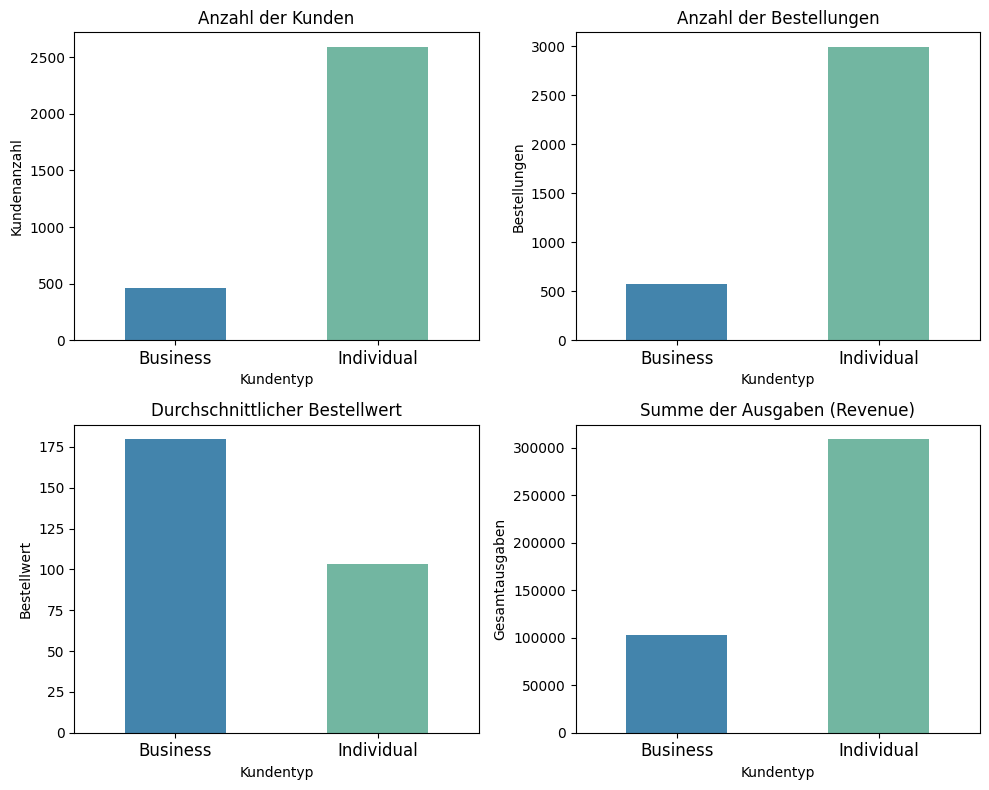

  customer_type  customer_count
0      Business             464
1    Individual            2590 

  customer_type  Orders.total
0      Business    179.576918
1    Individual    103.119686 

  customer_type  order_count
0      Business          571
1    Individual         2994 

  customer_type  total_spent
0      Business    102538.42
1    Individual    308740.34


In [219]:
# ---- COLORS ----
colors = {
    "Individual": "#66c2a5",
    "Business": "#3288bd"
}

# ==================CUSTOMER DATA========================
customers_unique = df.drop_duplicates(subset='Customers.id').copy()


customers_unique['customer_type'] = customers_unique['Customers.company'].map(
    lambda x: "Business" if x != "Individual" else "Individual"
)

customer_counts = (
    customers_unique.groupby('customer_type')['Customers.id']
    .count()
    .reset_index(name='customer_count')
    .sort_values('customer_type')
)

customer_colors = [colors[x] for x in customer_counts['customer_type']]

# ===================ORDER DATA=======================
orders_unique = df.drop_duplicates(subset='Orders.id').copy()

orders_unique['customer_type'] = orders_unique['is_business'].map({
    True: 'Business',
    False: 'Individual'
})

# ---- Mean order value ----
mean_values = (
    orders_unique.groupby('customer_type')['Orders.total']
    .mean()
    .reset_index()
    .sort_values('customer_type')
)

mean_colors = [colors[x] for x in mean_values['customer_type']]

# ---- Order count ----
order_counts = (
    orders_unique.groupby('customer_type')['Orders.id']
    .count()
    .reset_index(name='order_count')
    .sort_values('customer_type')
)

count_colors = [colors[x] for x in order_counts['customer_type']]

# ---- TOTAL SPENT (sum of Orders.total) ----
total_spent = (
    orders_unique.groupby('customer_type')['Orders.total']
    .sum()
    .reset_index(name='total_spent')
    .sort_values('customer_type')
)

total_colors = [colors[x] for x in total_spent['customer_type']]


# ===================PLOT=======================
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# === (1) CUSTOMER COUNT ===
sns.barplot(
    data=customer_counts,
    x='customer_type', y='customer_count',
    palette=customer_colors, width=0.5,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Anzahl der Kunden")
axes[0, 0].set_xlabel("Kundentyp")
axes[0, 0].set_ylabel("Kundenanzahl")
axes[0, 0].tick_params(axis='x', labelsize=12)

# === (2) ORDER COUNT ===
sns.barplot(
    data=order_counts,
    x='customer_type', y='order_count',
    palette=count_colors, width=0.5,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Anzahl der Bestellungen")
axes[0, 1].set_xlabel("Kundentyp")
axes[0, 1].set_ylabel("Bestellungen")
axes[0, 1].tick_params(axis='x', labelsize=12)

# === (3) MEAN ORDER VALUE ===
sns.barplot(
    data=mean_values,
    x='customer_type', y='Orders.total',
    palette=mean_colors, width=0.5,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Durchschnittlicher Bestellwert")
axes[1, 0].set_xlabel("Kundentyp")
axes[1, 0].set_ylabel("Bestellwert")
axes[1, 0].tick_params(axis='x', labelsize=12)


# === (4) TOTAL SPENT ===
sns.barplot(
    data=total_spent,
    x='customer_type', y='total_spent',
    palette=total_colors, width=0.5,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Summe der Ausgaben (Revenue)")
axes[1, 1].set_xlabel("Kundentyp")
axes[1, 1].set_ylabel("Gesamtausgaben")
axes[1, 1].tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()

# ===================TABLE=======================
print(customer_counts, "\n")
print(mean_values, "\n")
print(order_counts, "\n")
print(total_spent)

* * *

### **ORDER**

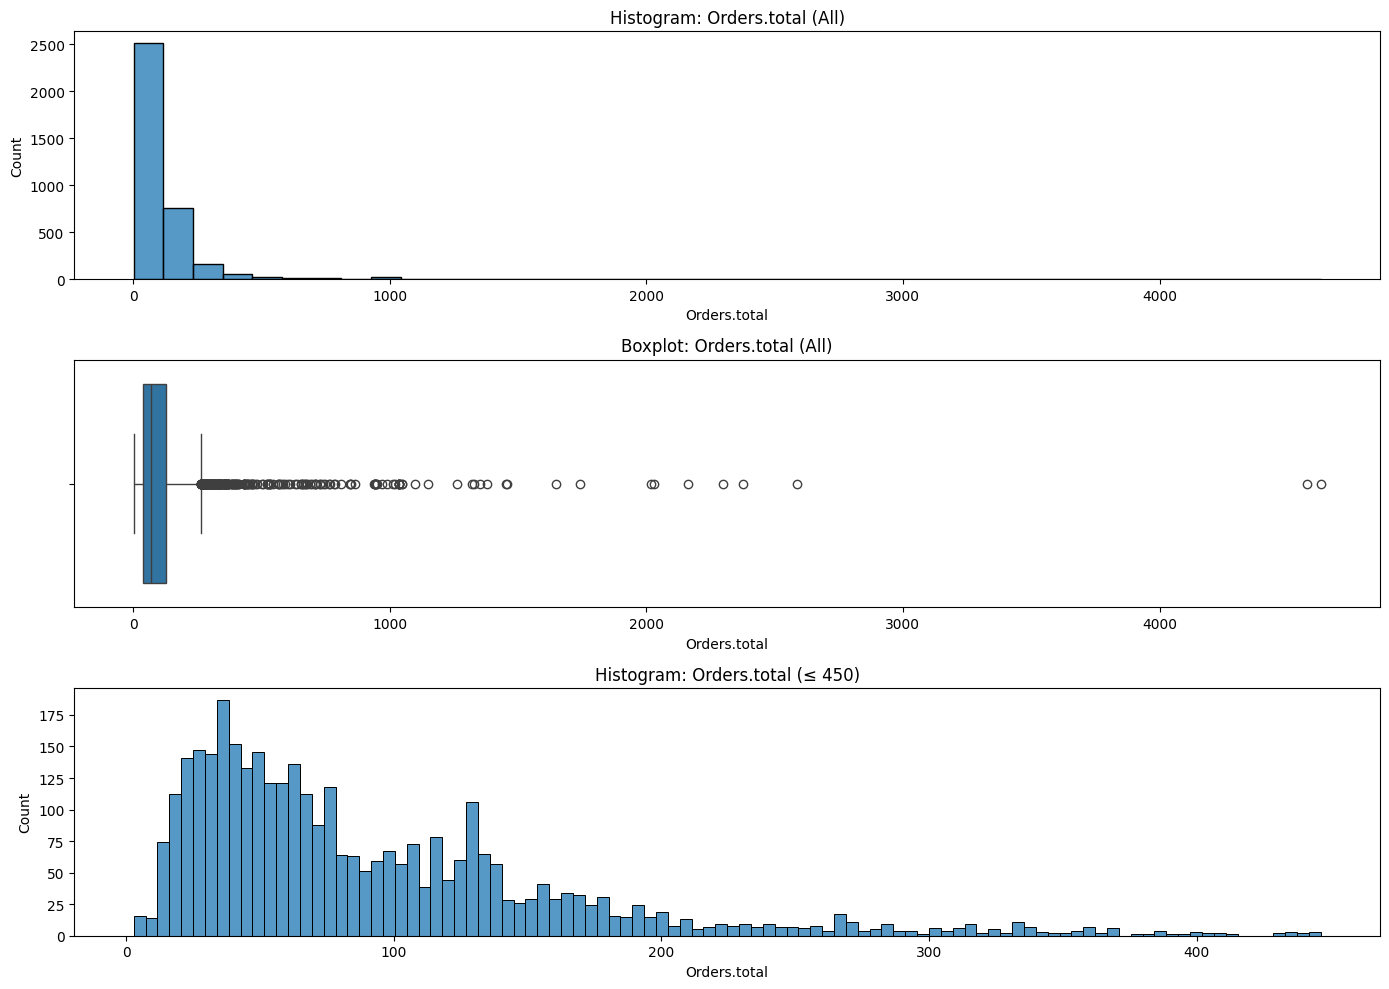

In [220]:
plt.figure(figsize=(14, 10))

# =================== 1. Histogram: all Orders.total 
plt.subplot(3, 1, 1)
sns.histplot(df_orders['Orders.total'], bins=40)
plt.title('Histogram: Orders.total (All)')

# =================== 2. Boxplot: all Orders.total 
plt.subplot(3, 1, 2)
sns.boxplot(x=df_orders['Orders.total'])
plt.title('Boxplot: Orders.total (All)')

# =================== 3. Histogram: Orders.total <= 450 
plt.subplot(3, 1, 3)
sns.histplot(df_orders[df_orders['Orders.total'] <= 450]['Orders.total'], bins=100)
plt.title('Histogram: Orders.total (≤ 450)')

plt.tight_layout()
plt.show()

In [ ]:
print("----------------------------------------------------\n")
print("   Kreuztabelle: Bestellstatus nach Zahlungsstatus  \n")
print("----------------------------------------------------\n")

ct_status = pd.crosstab(df_orders["Orders.status"], df_orders["Orders.payment_status"])
ct_status

----------------------------------------------------

   Kreuztabelle: Bestellstatus nach Zahlungsstatus  

----------------------------------------------------



Orders.payment_status,Paid,Pending,Unknown,Unpaid
Orders.status,,,,
Cancelled,13,11,0,0
Completed,3295,0,4,18
Error,1,0,0,0
On Hold,12,0,0,0
Pending,7,15,0,0
Refunded,101,9,1,0
Shipped,53,2,0,2
Unknown,3,1,0,0
Validation Required,17,0,0,0


In [221]:
print("----------------------------------------------------\n")
print("            Zahlungsart nach Zahlungsstatus  \n")
print("----------------------------------------------------\n")
ct_pay_method = pd.crosstab(df_orders["Orders.payment_method"], df_orders["Orders.payment_status"])
ct_pay_method

----------------------------------------------------

            Zahlungsart nach Zahlungsstatus  

----------------------------------------------------



Orders.payment_status,Paid,Pending,Unknown,Unpaid
Orders.payment_method,,,,
Cash,2,0,0,0
Check,24,0,0,0
Credit Card,360,0,5,6
PayPal,281,0,0,0
authorize.net,2835,38,0,0


In [223]:
df_orders["has_reorder"] = df_orders["Orders.reorder_id"].notna().astype(int)
df_orders["has_tax"] = (df_orders["Orders.tax"] > 0).astype(int)
df_orders["has_shipping"] = (df_orders["Orders.shipping"] > 0).astype(int)
df_orders["has_coupon"] = df_orders["Orders.coupon_id"].notna().astype(int)

# discount_name є завжди, але треба перевірити, чи там "No Discount", "" або NaN
df_orders["has_discount"] = df_orders["Orders.discount_name"].ne("No Discount").astype(int)

In [224]:
print("----------------------------------------------------\n")
print("  Kreuztabelle: Orders.status -- Feature-Indikatoren  \n")
print("----------------------------------------------------\n")

ct_features = df_orders.groupby("Orders.status", observed=True)[[
    "has_reorder",
    "has_tax",
    "has_shipping",
    "has_coupon",
    "has_discount"
]].sum()

ct_features

----------------------------------------------------

  Kreuztabelle: Orders.status -- Feature-Indikatoren  

----------------------------------------------------



,has_reorder,has_tax,has_shipping,has_coupon,has_discount
Orders.status,,,,,
Cancelled,1,1,17,3,0
Completed,61,235,2322,598,334
Error,0,0,0,0,0
On Hold,0,1,7,2,3
Pending,0,2,9,3,1
Refunded,0,7,67,22,2
Shipped,1,12,41,5,3
Unknown,0,0,3,0,0
Validation Required,0,3,10,7,0


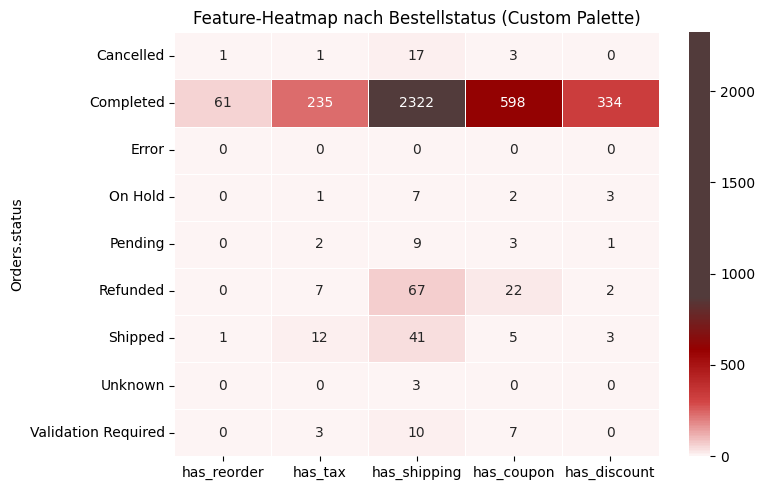

In [225]:
# # ---------- 1. Бінарні колонки ----------
# df_orders["has_reorder"] = df_orders["Orders.reorder_id"].notna().astype(int)
# df_orders["has_tax"] = (df_orders["Orders.tax"] > 0).astype(int)
# df_orders["has_coupon"] = df_orders["Orders.coupon_id"].notna().astype(int)
# df_orders["has_discount"] = df_orders["Orders.discount_name"].ne("No Discount").astype(int)

# # ---------- 2. Крос-таблиця ----------
# ct_features = df_orders.groupby("Orders.status")[[
#     "has_reorder",
#     "has_tax",
#     "has_shipping",
#     "has_coupon",
#     "has_discount"
# ]].sum()


# ---------- 3. Heatmap ----------
from matplotlib.colors import LinearSegmentedColormap

colors = [
    "#fdf4f4",  # 0%
    "#D34646",  # 10%
    "#970000",  # 25%
    "#523B3B",  
    "#523B3B",  # 50%
    "#523B3B", 
    "#523B3B",  # 75%
    "#523B3B",   
    "#523B3B",  # 100%         
]

custom_cmap = LinearSegmentedColormap.from_list("custom_heatmap", colors)

plt.figure(figsize=(8, 5))
sns.heatmap(
    ct_features,
    annot=True,
    fmt="d",
    cmap=custom_cmap,
    linewidths=0.5,
    linecolor="white"
)

plt.title("Feature-Heatmap nach Bestellstatus (Custom Palette)")
plt.ylabel("Orders.status")
plt.tight_layout()
plt.show()

In [ ]:
###   -- ПРИКЛАД зі стандартною кольоровою мапою
# sns.heatmap(
#     ct_features,
#     annot=True,
#     fmt="d",
#     cmap="Reds"
# )
# plt.tight_layout()


In [233]:
df['Orders.shipping'].value_counts(dropna=False).head(10)

Orders.shipping
9.95     2758
0.00     1110
NaN       195
6.71       16
6.45       15
5.05       14
19.41       8
6.73        7
6.52        7
6.68        4
Name: count, dtype: int64

In [234]:
df_clean = df_orders.dropna(subset=[
    "Orders.shipping_carrier",
    "Orders.shipping_method"
])

df_clean["shipping_paid"] = (df_clean["Orders.shipping"] > 0).astype(int)

C:\Users\Anna\AppData\Local\Temp\ipykernel_13720\3670468802.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["shipping_paid"] = (df_clean["Orders.shipping"] > 0).astype(int)


In [251]:
ct_carrier = pd.crosstab(
    df_clean["shipping_paid"],
    df_clean["Orders.shipping_carrier"]
)
ct_carrier.T

shipping_paid,0,1
Orders.shipping_carrier,,
FEDX,0,1
HWEP,0,1
INTF,0,1
MT03,0,1
NDSN,1,0
NSVA,1,0
RDWY,0,1
WTVA,1,1
fedex,375,1628


In [255]:
print(ct_carrier.index.tolist())


['FEDX', 'HWEP', 'INTF', 'MT03', 'NDSN', 'NSVA', 'RDWY', 'WTVA', 'fedex', 'manual', 'ups']


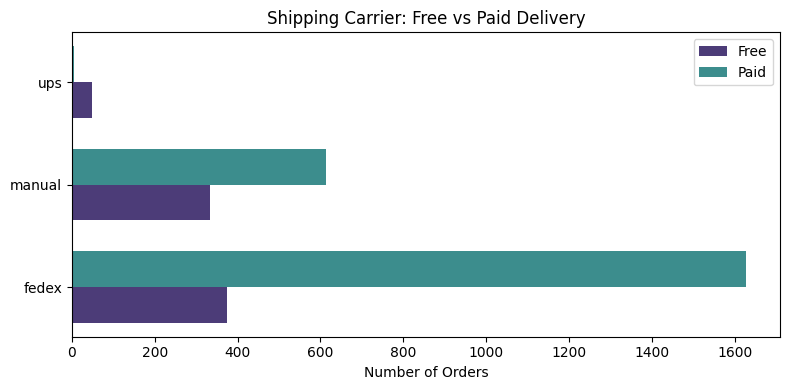

In [262]:
ct_carrier = pd.crosstab(
    df_clean["Orders.shipping_carrier"],
    df_clean["shipping_paid"]
)

# Select only standard methods
main_methods = ["fedex", "manual", "ups"]
ct_main = ct_carrier.loc[main_methods]

#  free or paid
free = ct_main[0].values
paid = ct_main[1].values
methods = ct_main.index.tolist()

# plot
x = np.arange(len(methods))
height = 0.35

plt.figure(figsize=(8, 4))
plt.barh(x - height/2, free, height, label="Free", color="#4C3C78")
plt.barh(x + height/2, paid, height, label="Paid", color="#3C8D8D")

plt.yticks(x, methods)
plt.xlabel("Number of Orders")
plt.title("Shipping Carrier: Free vs Paid Delivery")
plt.legend()

plt.tight_layout()
plt.show()

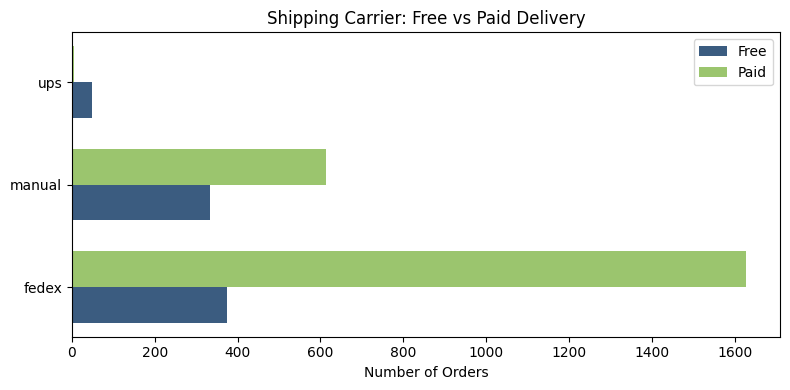

In [269]:
ct_carrier = pd.crosstab(
    df_clean["Orders.shipping_carrier"],
    df_clean["shipping_paid"]
)

# Select only standard methods
main_methods = ["fedex", "manual", "ups"]
ct_main = ct_carrier.loc[main_methods]

#  free or paid
free = ct_main[0].values
paid = ct_main[1].values
methods = ct_main.index.tolist()

# plot
x = np.arange(len(methods))
height = 0.35

plt.figure(figsize=(8, 4))
plt.barh(x - height/2, free, height, label="Free", color="#3B5C80")
plt.barh(x + height/2, paid, height, label="Paid", color="#9BC56E")

plt.yticks(x, methods)
plt.xlabel("Number of Orders")
plt.title("Shipping Carrier: Free vs Paid Delivery")
plt.legend()

plt.tight_layout()
plt.show()

In [245]:
ct_method = pd.crosstab(
    df_clean["shipping_paid"],
    df_clean["Orders.shipping_method"]
)
ct_method.T

shipping_paid,0,1
Orders.shipping_method,,
FEDERAL EXPRESS CORP.,0,1
Free Shipping,300,6
Ground,375,1628
"HOWARD'S EXPRESS, INC.",0,1
INTERNATIONAL FEDEX,0,1
MEDTRANS,0,1
NATIONAL DELIVERY,1,0
NATIONAL DELIVERY SYSTEMS,1,0
ROADWAY EXPRESS,0,1


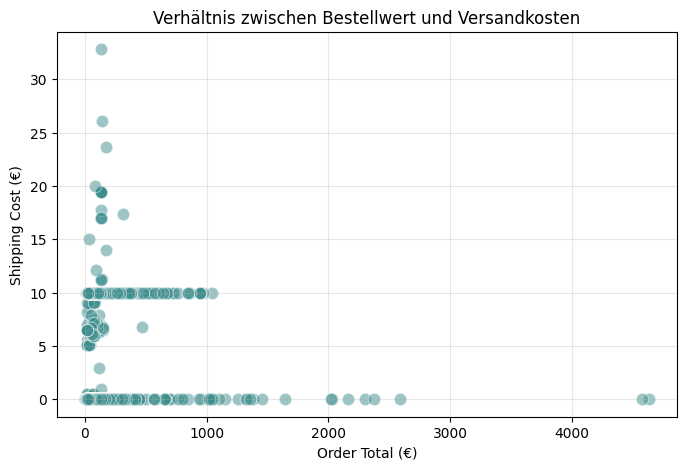

In [277]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df_orders,
    x="Orders.total",
    y="Orders.shipping",
    color="#3C8D8D",
    s=80,        # більші точки
    alpha=0.5    # більше прозорості
)

plt.xlabel("Order Total (€)")
plt.ylabel("Shipping Cost (€)")
plt.title("Verhältnis zwischen Bestellwert und Versandkosten")
plt.grid(True, alpha=0.3)
# Achsenbereich auf der Y-Achse so begrenzen, dass nur die kostenpflichtigen Lieferungen angezeigt werden (>0)
#plt.ylim(1,35)
plt.show()

C:\Users\Anna\AppData\Local\Temp\ipykernel_13720\3546407983.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Anna\AppData\Local\Temp\ipykernel_13720\3546407983.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


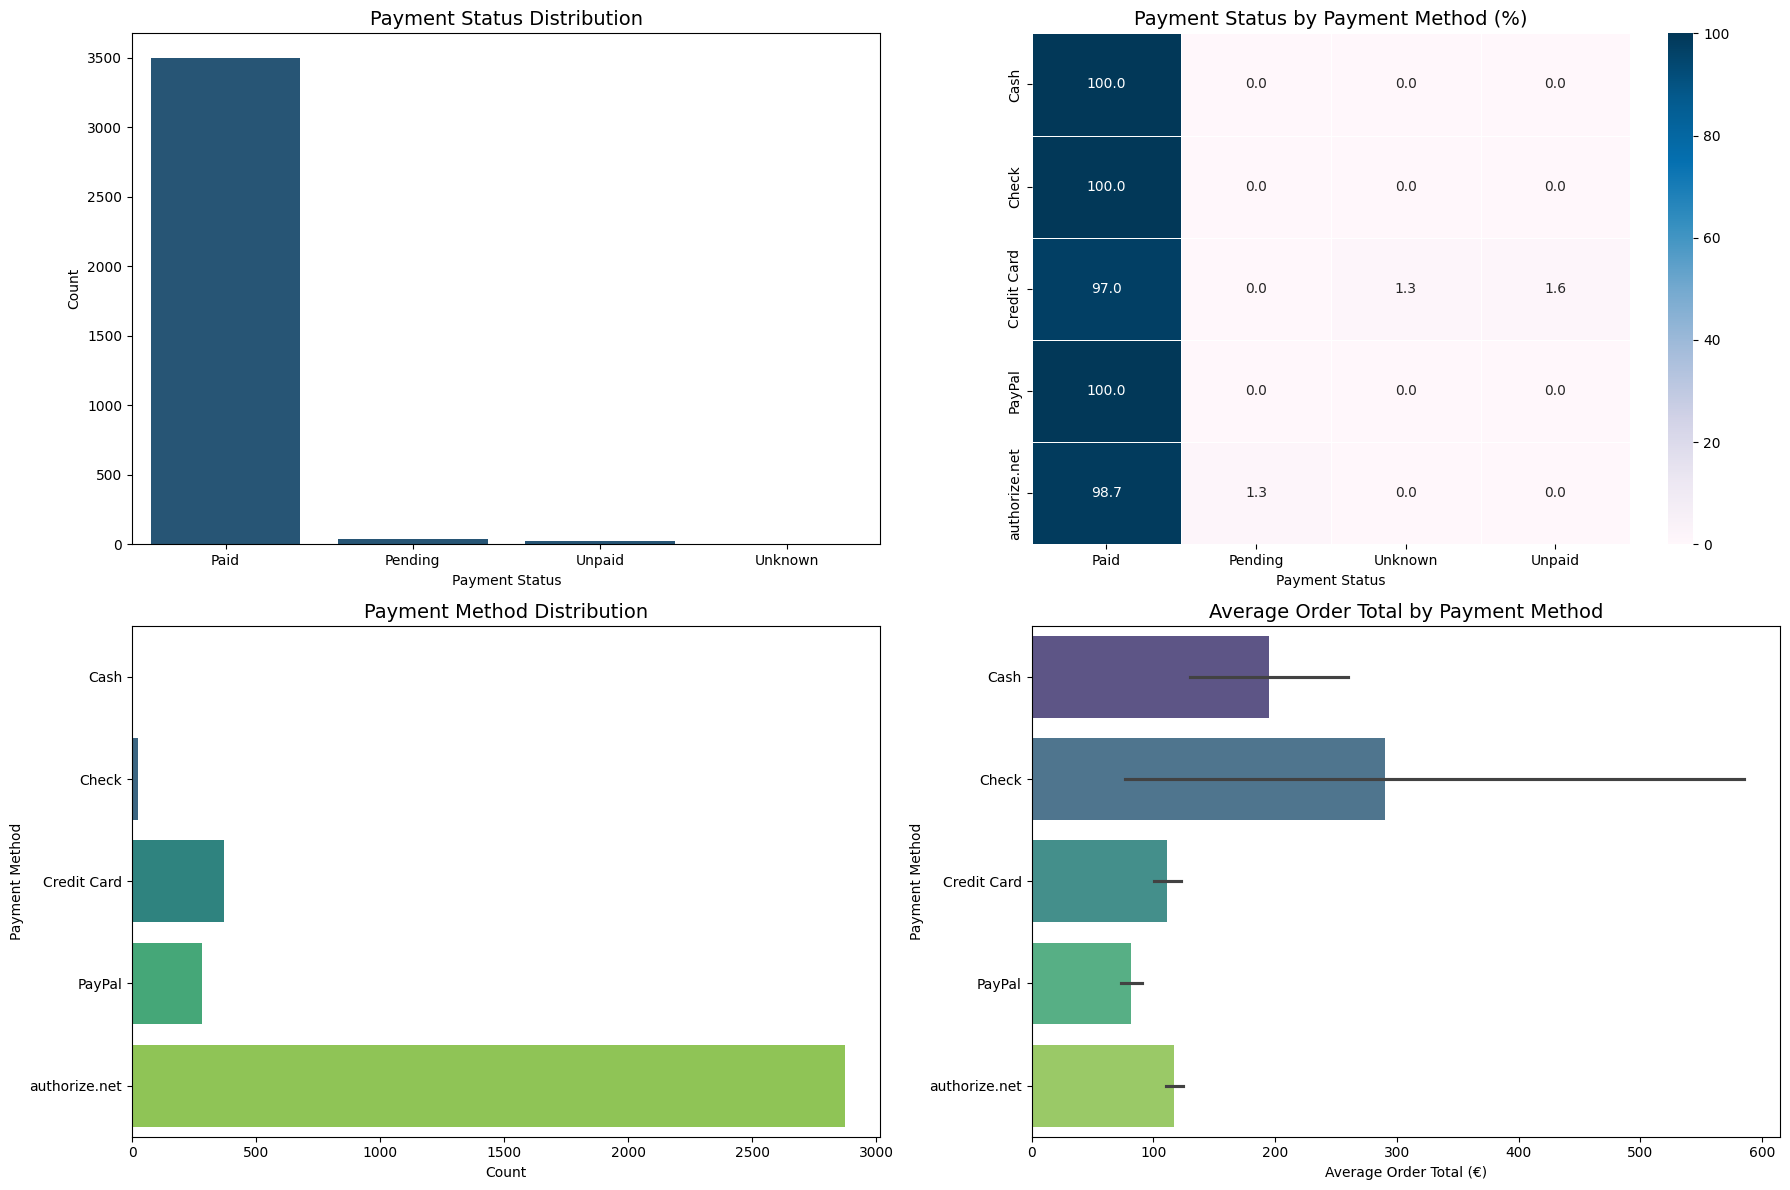

In [ ]:
# --- Єдиний порядок payment_method для графіків 3 і 4 ---
method_order = sorted(df_orders['Orders.payment_method'].dropna().unique())


fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# === 1. Payment Status Distribution ===
sns.countplot(
    data=df_orders,
    x='Orders.payment_status',
    order=df_orders['Orders.payment_status'].value_counts().index,
    ax=axes[0, 0],
    color="#1A5782"
 
)
axes[0, 0].set_title('Payment Status Distribution', fontsize=14)
axes[0, 0].set_xlabel('Payment Status')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=0)


# === 2. Heatmap (Payment Status by Payment Method) ===
ct = pd.crosstab(
    df_orders['Orders.payment_method'],
    df_orders['Orders.payment_status'],
    normalize='index'
) * 100

sns.heatmap(
    ct,
    annot=True,
    fmt=".1f",
    cmap='PuBu',
    linewidths=.5,
    ax=axes[0, 1]
)

axes[0, 1].set_title('Payment Status by Payment Method (%)', fontsize=14)
axes[0, 1].set_xlabel('Payment Status')
axes[0, 1].set_ylabel(' ')


# === 3. Payment Method Distribution (HORIZONTAL, sorted!) ===
sns.countplot(
    data=df_orders,
    y='Orders.payment_method',     # ← категорії тепер по осі Y
    order=method_order,
    ax=axes[1, 0],
    palette="viridis",
)
axes[1, 0].set_title('Payment Method Distribution', fontsize=14)
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Payment Method')
axes[1, 0].tick_params(axis='y', rotation=0)


# === 4. Average Order Total by Payment Method (HORIZONTAL) ===
sns.barplot(
    data=df_orders,
    y='Orders.payment_method',     # ← теж по Y
    x='Orders.total',
    estimator='mean',
    order=method_order,
    ax=axes[1, 1],
    palette="viridis",
    alpha=0.9
)
axes[1, 1].set_title('Average Order Total by Payment Method', fontsize=14)
axes[1, 1].set_xlabel('Average Order Total (€)')
axes[1, 1].set_ylabel('Payment Method')
axes[1, 1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()


'''confidence intervals - довірчі інтервали які seaborn додає за замовчуванням до barplot.
Вони показують:
Наскільки надійна оцінка середнього значення
Наявність варіації / розкиду даних в групі
Якщо лінія дуже довга - дані сильно варіюються (великий розкид значень)
Якщо коротка - середня оцінка стабільна.
'''

## Company

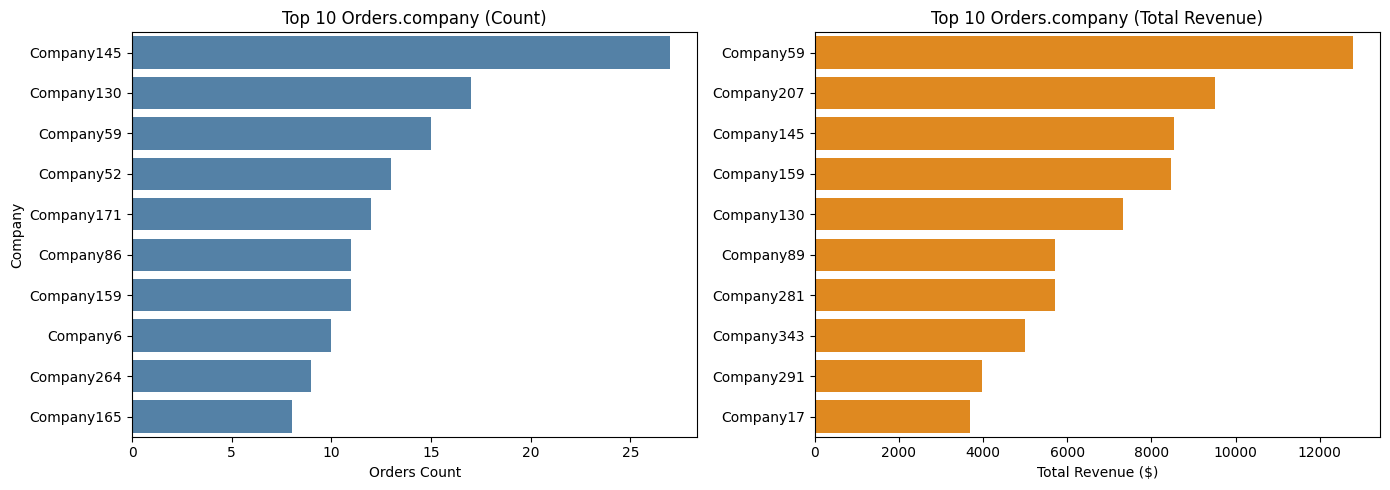

In [327]:
# --- 1. Top-10 компаній за кількістю ---
top_company_count = df['Orders.company'].value_counts().head(10)

# --- 2. Top-10 компаній за сумою замовлень ---
top_company_total = (
    df.groupby('Orders.company')['Orders.total']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(14, 5))

# === LEFT subplot — COUNT ===
plt.subplot(1, 2, 1)
sns.barplot(x=top_company_count.values, y=top_company_count.index, color="steelblue")
plt.title("Top 10 Orders.company (Count)")
plt.xlabel("Orders Count")
plt.ylabel("Company")

# === RIGHT subplot — TOTAL REVENUE ===
plt.subplot(1, 2, 2)
sns.barplot(x=top_company_total.values, y=top_company_total.index, color="darkorange")
plt.title("Top 10 Orders.company (Total Revenue)")
plt.xlabel("Total Revenue ($)")
plt.ylabel("")

plt.tight_layout()
plt.show()

In [329]:
### --- outliers investigation --- ORDERs!!!!!
#Filtered High-Value Orders ( >1500€ )

#df_orders[df_orders['Orders.total'] > 1500].sort_values(by='Orders.total', ascending=False)

print("----------------------------------------------------\n")
print("      Hochwertige Bestellungen (über 1500 $)       \n")
print("----------------------------------------------------\n")

df_orders[df_orders['Orders.total'] > 1500] \
    .sort_values(by='Orders.total', ascending=False) \
    [['Orders.id', 'Orders.customer_id', 'Orders.total', 'Orders.payment_amount' ]]


----------------------------------------------------

      Hochwertige Bestellungen (über 1500 $)       

----------------------------------------------------



,Orders.id,Orders.customer_id,Orders.total,Orders.payment_amount
473,2144,442,4627.95,4627.95
2936,14924,3006,4575.00,4575.00
3129,15657,3234,2588.00,2588.00
2035,10729,2022,2375.59,2375.59
128,572,143,2300.00,2300.00
3083,15457,3174,2164.30,2164.30
1931,9742,1918,2031.93,2031.93
2510,12835,2539,2017.92,NaN
2511,12836,2540,1740.00,580.00
203,965,218,1647.06,1548.06


### **Items**

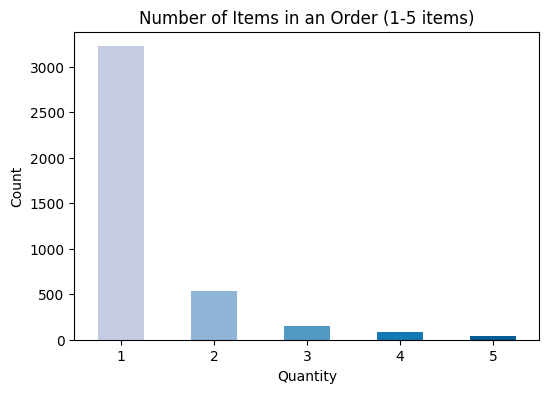

In [309]:
colors = sns.color_palette("PuBu", n_colors=6)[1:6]
small_qty = df[df['Order_Items.qty'] <= 5]

plt.figure(figsize=(6, 4))

small_qty['Order_Items.qty'] \
    .value_counts() \
    .sort_index() \
    .plot(kind='bar',  color=colors)


plt.title('Number of Items in an Order (1-5 items)')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

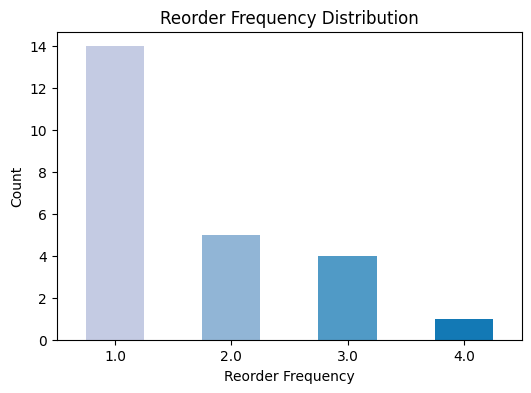

In [ ]:
colors = sns.color_palette("PuBu", n_colors=6)[1:6]

plt.figure(figsize=(6, 4))

(df_items[df_items['Order_Items.reorder_frequency'].notna()]['Order_Items.reorder_frequency']
    .value_counts()
    .sort_index()
    .plot(kind='bar', color=colors))

plt.title('Reorder Frequency Distribution')
plt.xlabel('Reorder Frequency')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

<Axes: xlabel='Order_Items.price', ylabel='Count'>

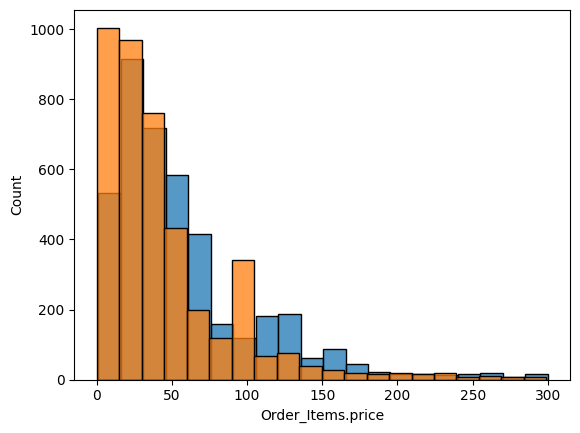

In [ ]:
sns.histplot(df_items[df_items["Order_Items.price"] <= 300], x="Order_Items.price", bins=20)
sns.histplot(df_items[df_items["Order_Items.cost"] <= 300], x="Order_Items.cost", bins=20)


<Axes: xlabel='Order_Items.price', ylabel='Count'>

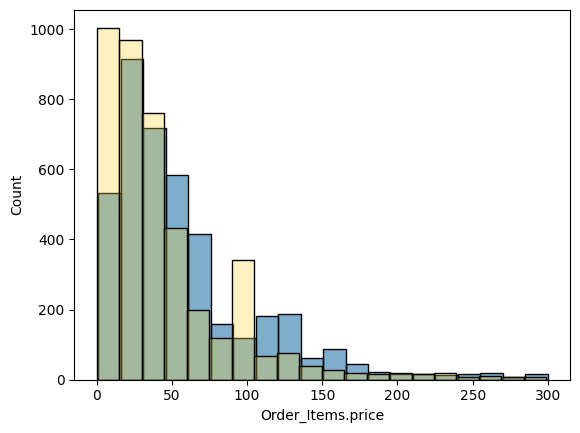

In [ ]:
sns.histplot(
    df_items[df_items["Order_Items.price"] <= 300],
    x="Order_Items.price",
    bins=20,
    color="#005C9A", 
    alpha=0.5        
)

sns.histplot(
    df_items[df_items["Order_Items.cost"] <= 300],
    x="Order_Items.cost",
    bins=20,
    color="#fcd432", 
    alpha=0.3   
)


<Axes: xlabel='Order_Items.qty', ylabel='line_revenue'>

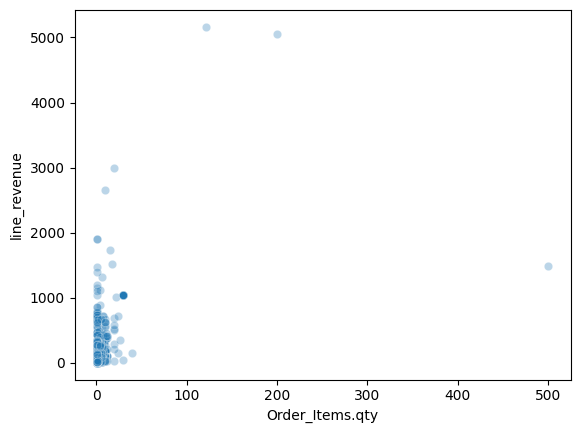

In [321]:
df_items["line_revenue"] = df_items["Order_Items.qty"] * df_items["Order_Items.price"]

sns.scatterplot(
    data=df_items,
    x="Order_Items.qty",
    y="line_revenue",
    alpha=0.3
)

<Axes: xlabel='count', ylabel='avg_price'>

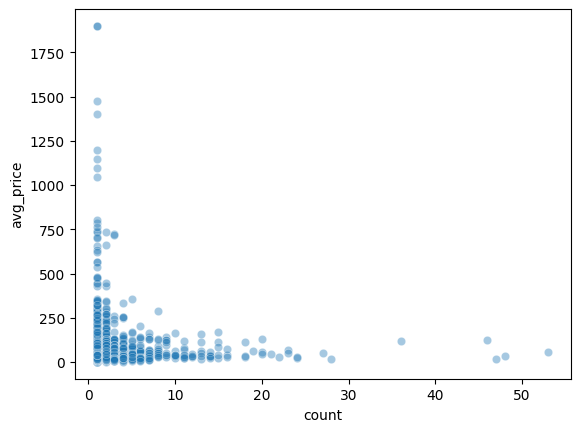

In [ ]:
group_product_name = df_items.groupby("Order_Items.product_name").agg(
    count=("Order_Items.id", "count"),
    avg_price=("Order_Items.price", "mean")
)
sns.scatterplot(data=group_product_name, x="count", y="avg_price", alpha=0.4)


## Price

In [ ]:
### --- outliers investigation --- PRICE!!!!!
#Filtered High-Value Orders ( >1500€ )

#df_orders[df_orders['Orders.total'] > 1500].sort_values(by='Orders.total', ascending=False)

print("----------------------------------------------------\n")
print("      Hochwertige Bestellungen (über 1500 $)       \n")
print("----------------------------------------------------\n")

df_orders[df_orders['Orders.total'] > 1500] \
    .sort_values(by='Orders.total', ascending=False) \
    [['Orders.id', 'Orders.customer_id', 'Orders.total', 'Orders.payment_amount' ]]


----------------------------------------------------

      Hochwertige Bestellungen (über 1500 $)       

----------------------------------------------------



,Orders.id,Orders.customer_id,Orders.total,Orders.payment_amount
473,2144,442,4627.95,4627.95
2936,14924,3006,4575.00,4575.00
3129,15657,3234,2588.00,2588.00
2035,10729,2022,2375.59,2375.59
128,572,143,2300.00,2300.00
3083,15457,3174,2164.30,2164.30
1931,9742,1918,2031.93,2031.93
2510,12835,2539,2017.92,NaN
2511,12836,2540,1740.00,580.00
203,965,218,1647.06,1548.06


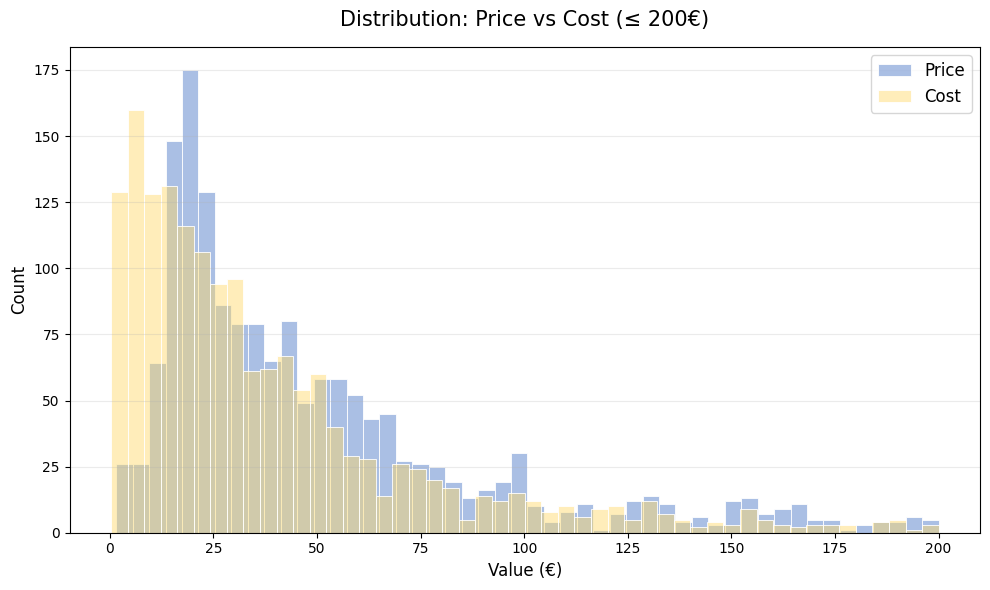

In [346]:
plt.figure(figsize=(10, 6))

# --- красиві кольори ---
price_color = "#4472C4"   # стильний синій
cost_color  = "#FFD966"   # м'який жовтий

# --- гістограма price ---
sns.histplot(
    df_products[(df_products["Products.price"].notna()) &
                (df_products["Products.price"] <= 200)],
    x="Products.price",
    bins=50,
    color=price_color,
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6
)

# --- гістограма cost ---
sns.histplot(
    df_products[(df_products["Products.cost"].notna()) &
                (df_products["Products.cost"] <= 200)],
    x="Products.cost",
    bins=50,
    color=cost_color,
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6
)

# --- покращення стилю ---
plt.title("Distribution: Price vs Cost (≤ 200€)", fontsize=15, pad=15)
plt.xlabel("Value (€)", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis='y', alpha=0.25)
plt.legend(["Price", "Cost"], fontsize=12)

plt.tight_layout()
plt.show()

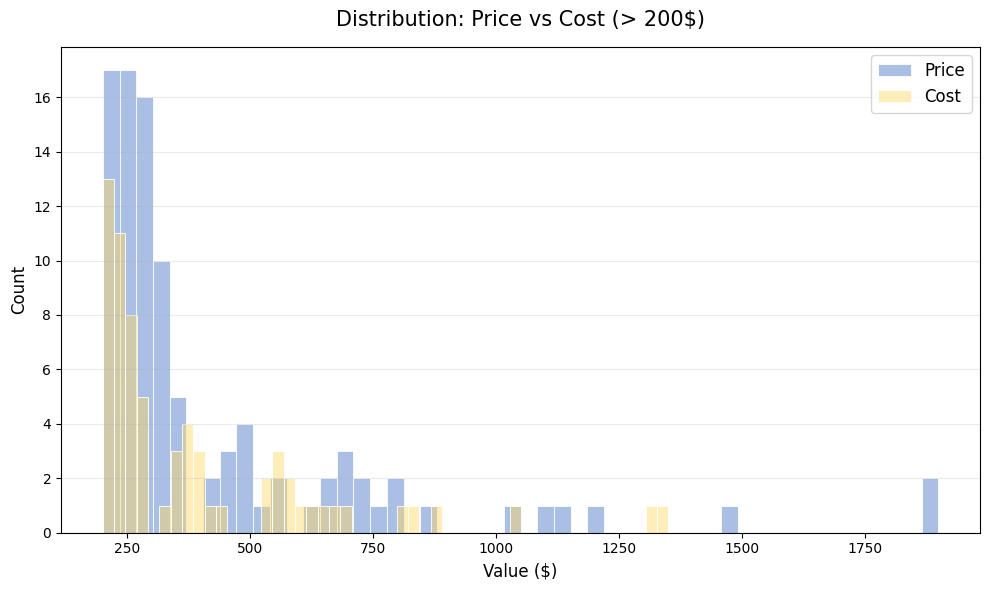

In [360]:
plt.figure(figsize=(10, 6))

price_color = "#4472C4"   
cost_color  = "#FFD966"   

# ---  price ---
sns.histplot(
    df_products[(df_products["Products.price"].notna()) &
                (df_products["Products.price"] > 200)],
    x="Products.price",
    bins=50,
    color=price_color,
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6
)

# ---  cost ---
sns.histplot(
    df_products[(df_products["Products.cost"].notna()) &
                (df_products["Products.cost"] > 200)],
    x="Products.cost",
    bins=50,
    color=cost_color,
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6
)

# ---  style ---
plt.title("Distribution: Price vs Cost (> 200$)", fontsize=15, pad=15)
plt.xlabel("Value ($)", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis='y', alpha=0.25)
plt.legend(["Price", "Cost"], fontsize=12)

plt.tight_layout()
plt.show()

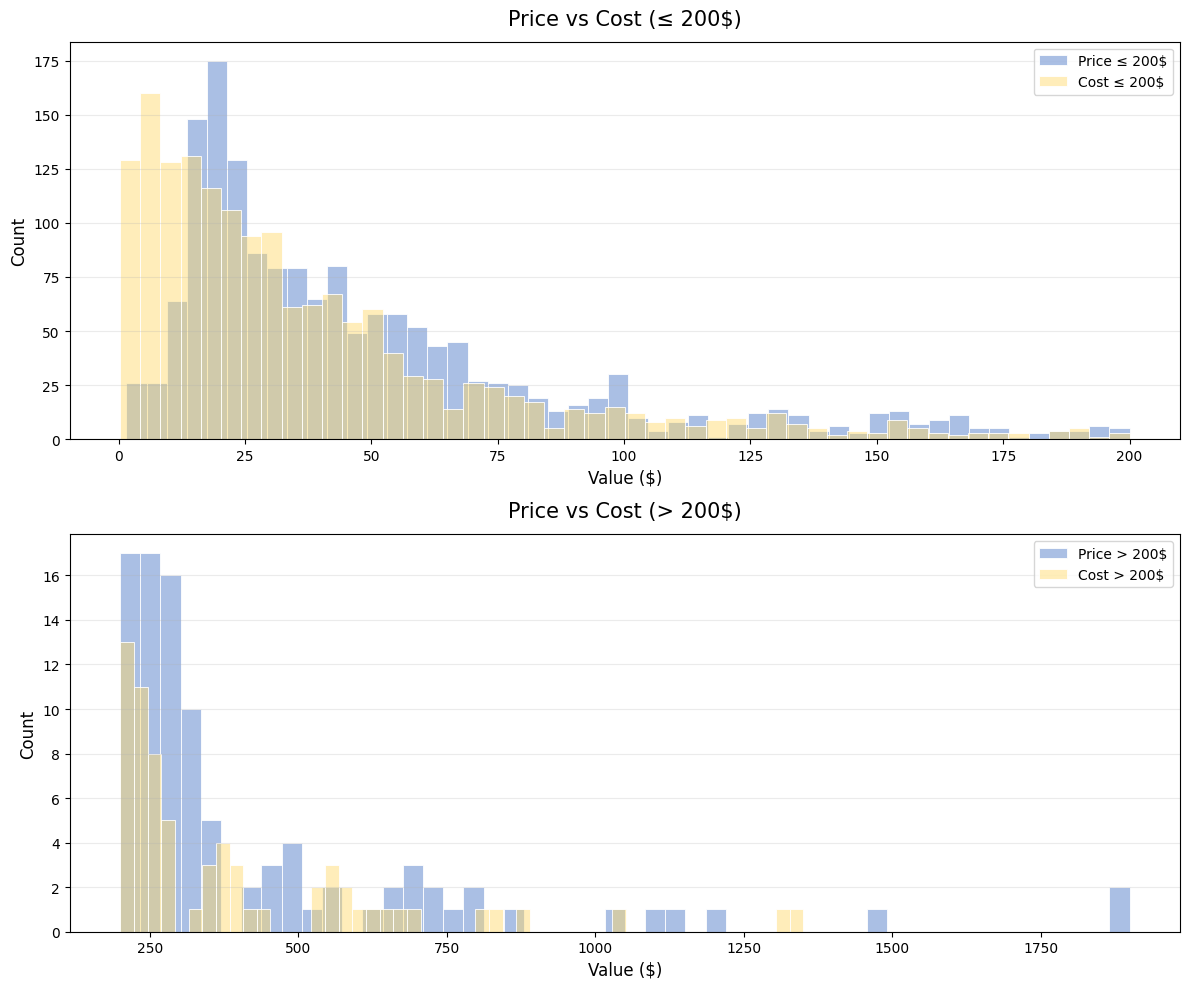

In [371]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

price_color = "#4472C4"   # blue
cost_color  = "#FFD966"   # yellow


# ===== TOP subplot: ≤ 200$ =====
sns.histplot(
    df_products[(df_products["Products.price"].notna()) &
                (df_products["Products.price"] <= 200)],
    x="Products.price",
    bins=50,
    color=price_color,
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6,
    ax=axes[0]
)

sns.histplot(
    df_products[(df_products["Products.cost"].notna()) &
                (df_products["Products.cost"] <= 200)],
    x="Products.cost",
    bins=50,
    color=cost_color,
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6,
    ax=axes[0]
)

axes[0].set_title("Price vs Cost (≤ 200$)", fontsize=15, pad=12)
axes[0].set_xlabel("Value ($)", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].grid(axis='y', alpha=0.25)
axes[0].legend(["Price ≤ 200$", "Cost ≤ 200$"])


# ===== BOTTOM subplot: > 200$ =====
sns.histplot(
    df_products[(df_products["Products.price"].notna()) &
                (df_products["Products.price"] > 200)],
    x="Products.price",
    bins=50,
    color=price_color,
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6,
    ax=axes[1]
)

sns.histplot(
    df_products[(df_products["Products.cost"].notna()) &
                (df_products["Products.cost"] > 200)],
    x="Products.cost",
    bins=50,
    color=cost_color,
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6,
    ax=axes[1]
)

axes[1].set_title("Price vs Cost (> 200$)", fontsize=15, pad=12)
axes[1].set_xlabel("Value ($)", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].grid(axis='y', alpha=0.25)
axes[1].legend(["Price > 200$", "Cost > 200$"])


plt.tight_layout()
plt.show()


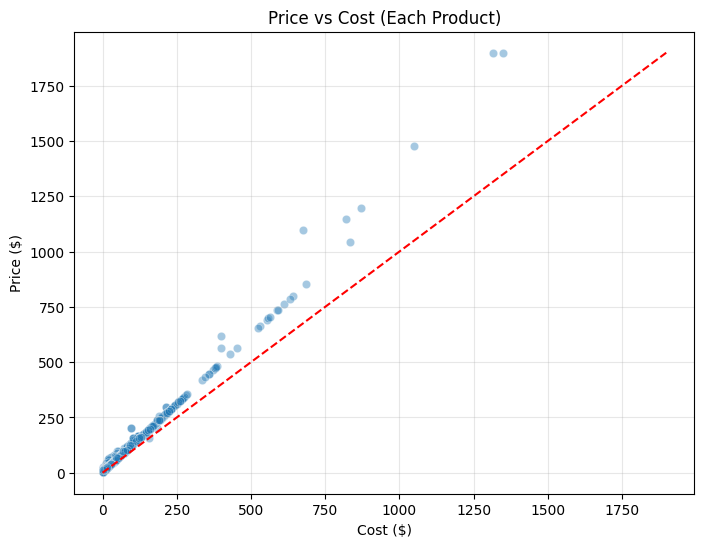

In [375]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_products,
    x="Products.cost",
    y="Products.price",
    alpha=0.4
)

# Лінія price = cost
max_val = max(df_products["Products.price"].max(), df_products["Products.cost"].max())
plt.plot([0, max_val], [0, max_val], color="red", linestyle="--")

plt.xlabel("Cost ($)")
plt.ylabel("Price ($)")
plt.title("Price vs Cost (Each Product)")
plt.grid(alpha=0.3)
plt.show()

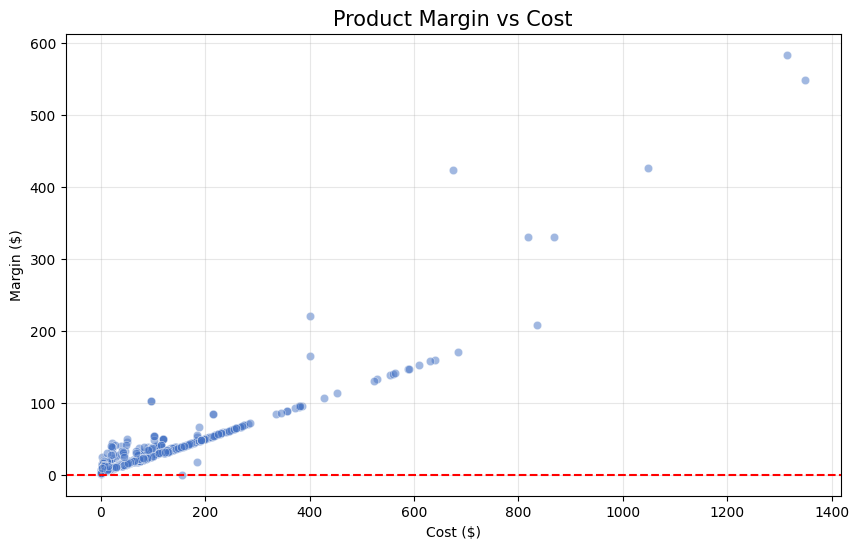

In [376]:
df_products["margin"] = (
    df_products["Products.price"] - df_products["Products.cost"]
)

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_products,
    x="Products.cost",
    y="margin",
    alpha=0.5,
    color="#4472C4"
)

plt.axhline(0, color="red", linestyle="--")  # лінія нульової маржі

plt.title("Product Margin vs Cost", fontsize=15)
plt.xlabel("Cost ($)")
plt.ylabel("Margin ($)")
plt.grid(alpha=0.3)
plt.show()


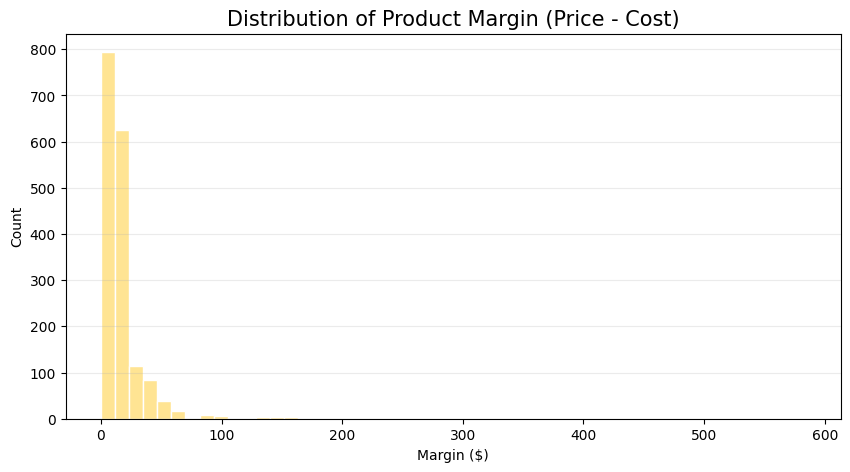

In [377]:
plt.figure(figsize=(10, 5))

sns.histplot(
    df_products["margin"].dropna(),
    bins=50,
    color="#FFD966",
    edgecolor="white",
    alpha=0.7
)

plt.title("Distribution of Product Margin (Price - Cost)", fontsize=15)
plt.xlabel("Margin ($)")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.25)
plt.show()


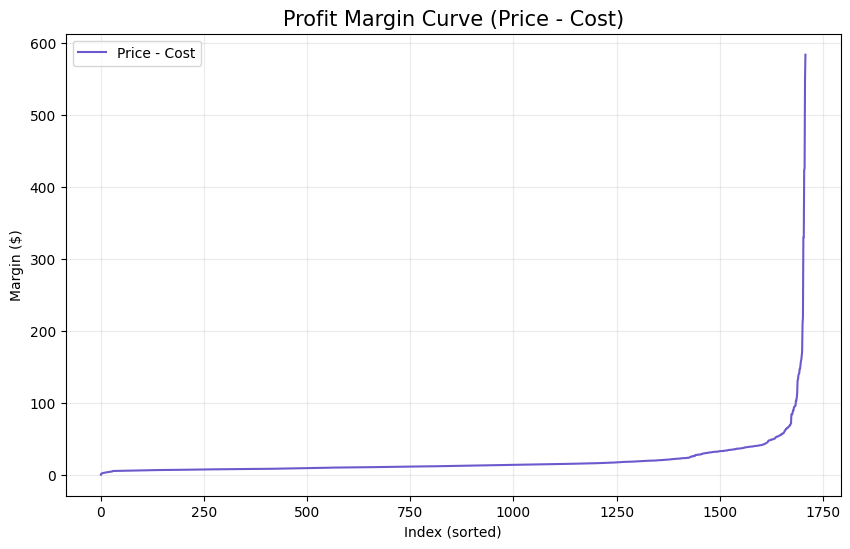

In [374]:
plt.figure(figsize=(10, 6))

diff = df_products["Products.price"] - df_products["Products.cost"]

plt.plot(diff.dropna().sort_values().reset_index(drop=True),
         color="#6A5ACD", label="Price - Cost")

plt.title("Profit Margin Curve (Price - Cost)", fontsize=15)
plt.xlabel("Index (sorted)")
plt.ylabel("Margin ($)")
plt.grid(alpha=0.25)
plt.legend()
plt.show()

In [379]:
df_products["margin"] = df_products["Products.price"] - df_products["Products.cost"]

# Топ 10 товарів із найбільшою маржею
top_margin = (
    df_products[["Products.name", "Products.price", "Products.cost", "margin"]]
    .sort_values(by="margin", ascending=False)
    .head(10)
)

top_margin

,Products.name,Products.price,Products.cost,margin
1211,Battery Powered Electric Patient Lift with Rec...,1899.00,1315.00,584.00
884,Cirrus Plus EC Folding Power Wheelchair,1899.00,1350.00,549.00
119,Titan Transportable Front Wheel Power Wheelchair,1475.00,1049.00,426.00
1708,Spitfire EX Compact Travel Power Mobility Scoo...,1099.00,675.00,424.00
365,"Phoenix Heavy Duty Power Scooter, 3 Wheel",1149.00,819.00,330.00
452,"Phoenix Heavy Duty Power Scooter, 4 Wheel",1199.00,869.00,330.00
1323,Hydraulic Patient Lift with Six Point Cradle,620.00,399.99,220.01
571,Deluxe Sentra Heavy Duty Extra Extra Wide Whee...,1043.75,835.00,208.75
889,CircuFlow Lymphedema Pumps,855.14,684.11,171.03
1100,Bellavita Auto Bath Tub Chair Seat Lift,565.00,399.99,165.01


C:\Users\Anna\AppData\Local\Temp\ipykernel_13720\72573944.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


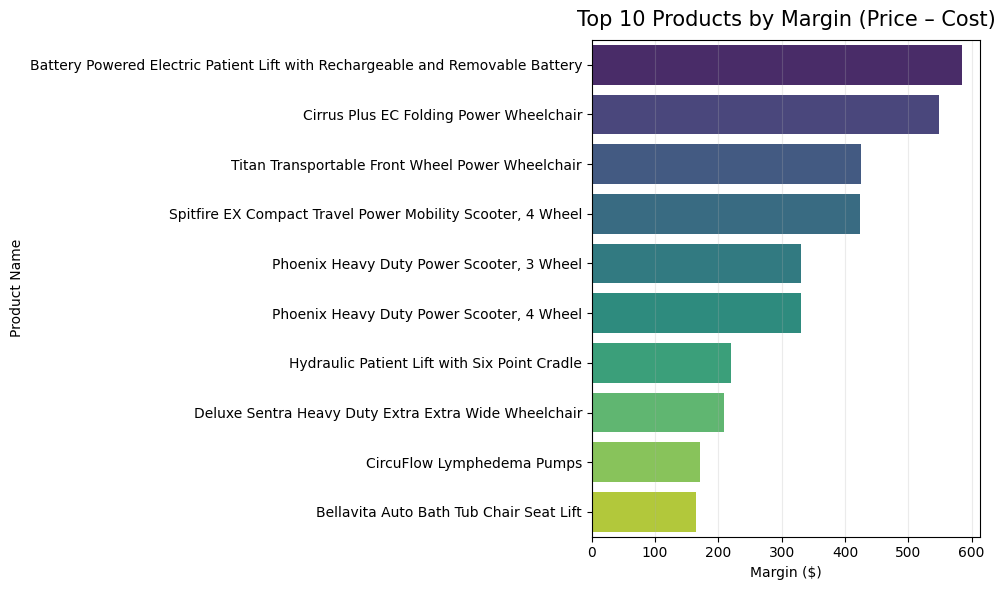

In [381]:
# 1. Створюємо колонку маржі
df_products["margin"] = df_products["Products.price"] - df_products["Products.cost"]

# 2. Вибираємо топ-10 товарів
top_margin = (
    df_products[["Products.name", "Products.price", "Products.cost", "margin"]]
    .sort_values(by="margin", ascending=False)
    .head(10)
)

# 3. Будуємо barplot
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_margin,
    x="margin",
    y="Products.name",
    palette="viridis"
)

plt.title("Top 10 Products by Margin (Price – Cost)", fontsize=15, pad=10)
plt.xlabel("Margin ($)")
plt.ylabel("Product Name")

plt.grid(axis="x", alpha=0.25)
plt.tight_layout()
plt.show()


C:\Users\Anna\AppData\Local\Temp\ipykernel_13720\3174607890.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


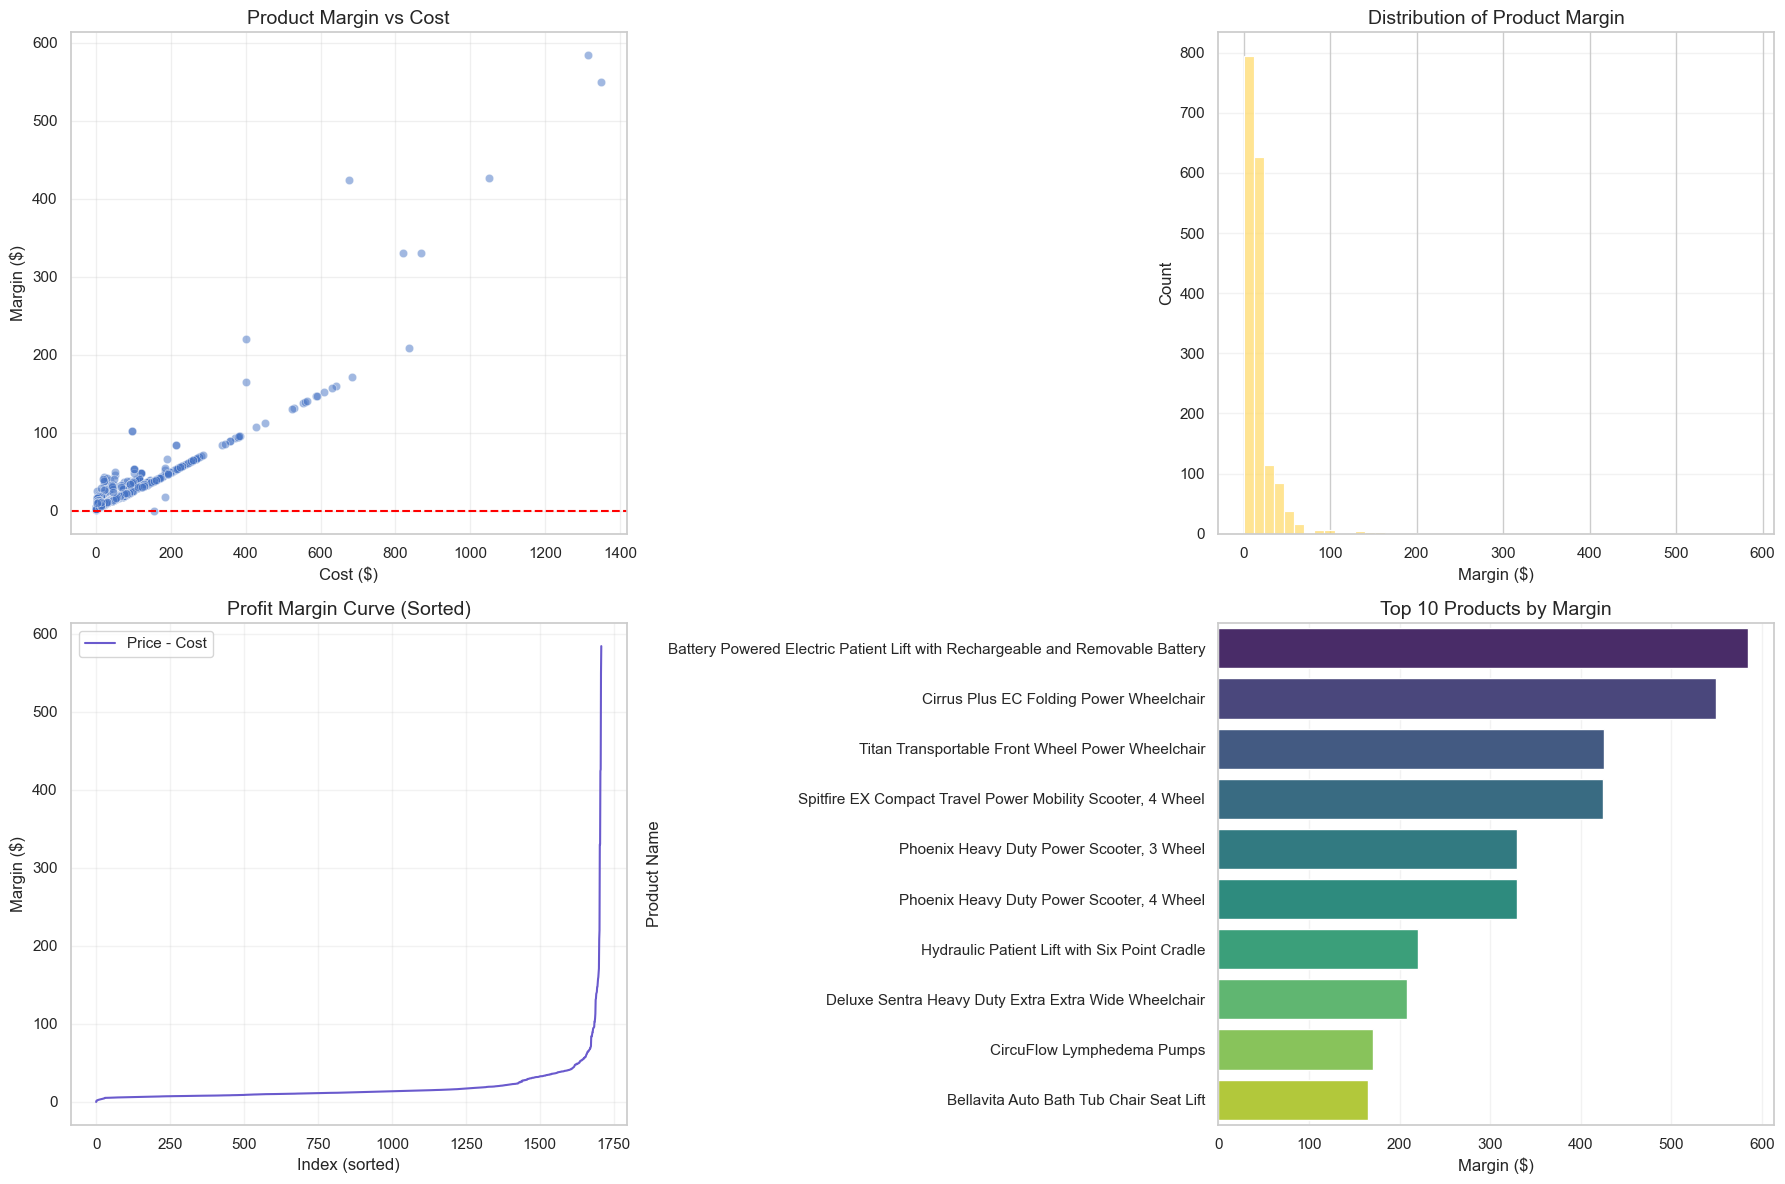

In [426]:
df_products["margin"] = df_products["Products.price"] - df_products["Products.cost"]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
(ax1, ax2), (ax3, ax4) = axes


# === 1. Scatter: Margin vs Cost ===
sns.scatterplot(
    data=df_products,
    x="Products.cost",
    y="margin",
    alpha=0.5,
    color="#4472C4",
    ax=ax1
)
ax1.axhline(0, color="red", linestyle="--")
ax1.set_title("Product Margin vs Cost", fontsize=14)
ax1.set_xlabel("Cost ($)")
ax1.set_ylabel("Margin ($)")
ax1.grid(alpha=0.3)


# === 2. Histogram of Margins ===
sns.histplot(
    df_products["margin"].dropna(),
    bins=50,
    color="#FFD966",
    edgecolor="white",
    alpha=0.7,
    ax=ax2
)
ax2.set_title("Distribution of Product Margin", fontsize=14)
ax2.set_xlabel("Margin ($)")
ax2.set_ylabel("Count")
ax2.grid(axis='y', alpha=0.25)


# === 3. Line plot: Sorted Margin Curve ===
diff_sorted = df_products["margin"].dropna().sort_values().reset_index(drop=True)

ax3.plot(diff_sorted, color="#6A5ACD", label="Price - Cost")
ax3.set_title("Profit Margin Curve (Sorted)", fontsize=14)
ax3.set_xlabel("Index (sorted)")
ax3.set_ylabel("Margin ($)")
ax3.grid(alpha=0.25)
ax3.legend()


# === 4. Top 10 Margin Products (barplot) ===
top_margin = (
    df_products[["Products.name", "Products.price", "Products.cost", "margin"]]
    .sort_values(by="margin", ascending=False)
    .head(10)
)

sns.barplot(
    data=top_margin,
    x="margin",
    y="Products.name",
    palette="viridis",
    ax=ax4
)
ax4.set_title("Top 10 Products by Margin", fontsize=14)
ax4.set_xlabel("Margin ($)")
ax4.set_ylabel("Product Name")
ax4.grid(axis="x", alpha=0.25)


plt.tight_layout()
plt.show()


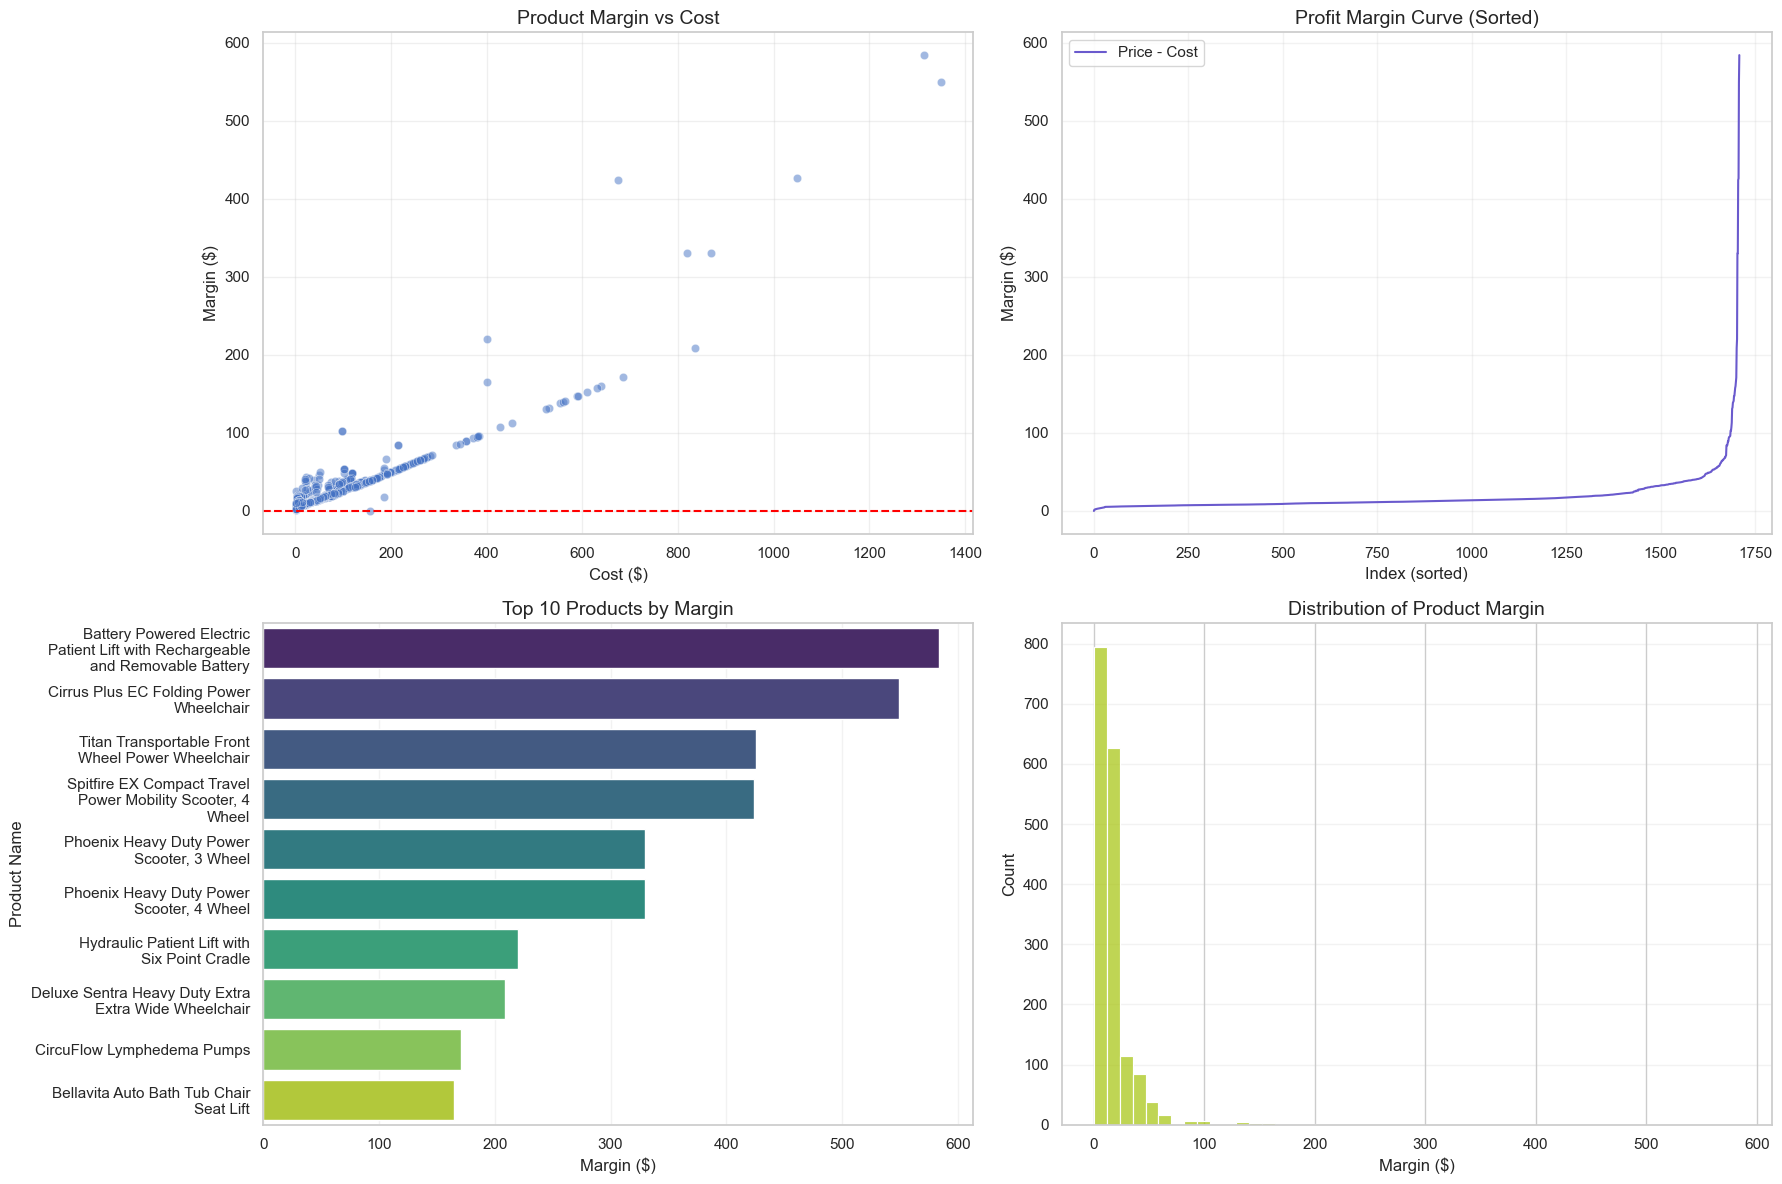

In [429]:
df_products["margin"] = df_products["Products.price"] - df_products["Products.cost"]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
(ax1, ax2), (ax3, ax4) = axes


# === 1 (old 1): Scatter: Margin vs Cost ===
sns.scatterplot(
    data=df_products,
    x="Products.cost",
    y="margin",
    alpha=0.5,
    color="#4472C4",
    ax=ax1
)
ax1.axhline(0, color="red", linestyle="--")
ax1.set_title("Product Margin vs Cost", fontsize=14)
ax1.set_xlabel("Cost ($)")
ax1.set_ylabel("Margin ($)")
ax1.grid(alpha=0.3)


# === 2 (old 3): Line plot: Sorted Margin Curve ===
diff_sorted = df_products["margin"].dropna().sort_values().reset_index(drop=True)

ax2.plot(diff_sorted, color="#6A5ACD", label="Price - Cost")
ax2.set_title("Profit Margin Curve (Sorted)", fontsize=14)
ax2.set_xlabel("Index (sorted)")
ax2.set_ylabel("Margin ($)")
ax2.grid(alpha=0.25)
ax2.legend()


# === 3 (old 4): Top 10 Margin Products (barplot with line break) ===
top_margin = (
    df_products[["Products.name", "Products.price", "Products.cost", "margin"]]
    .sort_values(by="margin", ascending=False)
    .head(10)
)

# перенос слів
top_margin["label_2lines"] = top_margin["Products.name"].apply(lambda x: fill(x, width=30))

sns.barplot(
    data=top_margin,
    x="margin",
    y="label_2lines",
    hue="label_2lines",
    palette="viridis",
    ax=ax3
)
ax3.set_title("Top 10 Products by Margin", fontsize=14)
ax3.set_xlabel("Margin ($)")
ax3.set_ylabel("Product Name")
ax3.grid(axis="x", alpha=0.25)


# === 4 (old 2): Histogram of Margins ===
sns.histplot(
    df_products["margin"].dropna(),
    bins=50,
    color="#A5C40C",
    edgecolor="white",
    alpha=0.7,
    ax=ax4
    
)
ax4.set_title("Distribution of Product Margin", fontsize=14)
ax4.set_xlabel("Margin ($)")
ax4.set_ylabel("Count")
ax4.grid(axis='y', alpha=0.25)



plt.tight_layout()
plt.show()

In [410]:
# --- Частота значень ---
# status_counts = df_products['Products.status'].value_counts().sort_values(ascending=False)
# vendor_counts = df_products['Products.vendor'].value_counts().sort_values(ascending=False)



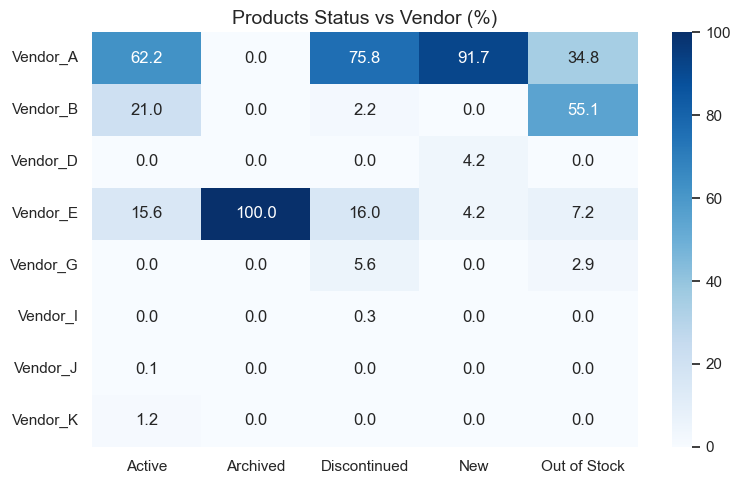

In [409]:
cr_vendor_prod = pd.crosstab(df_products['Products.status'], 
                       df_products['Products.vendor'],
                       normalize='index') * 100
#cr_vendor_prod.round(1)


plt.figure(figsize=(8, 5))
sns.heatmap(
    cr_vendor_prod.T, 
    cmap="Blues", 
    annot=True, 
    fmt=".1f"
)

plt.title("Products Status vs Vendor (%)", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [164]:
orders_per_customer = df_orders['Orders.customer_id'].value_counts()
orders_per_customer

Orders.customer_id
851     18
515     15
1371    15
403     15
1043    14
        ..
59       1
60       1
61       1
62       1
3698     1
Name: count, Length: 3054, dtype: int64

In [165]:
aov_per_customer = df_orders.groupby('Orders.customer_id')['Orders.total'].mean()
aov_per_customer

Orders.customer_id
3        54.360000
4        29.550000
5        41.663333
7        49.140000
8        69.700000
           ...    
3730     16.060000
3732     39.990000
3733    989.100000
3735    129.990000
3736     24.540000
Name: Orders.total, Length: 3054, dtype: float64

### **Products**

In [213]:
df['Products.taxable'].isna().sum()

np.int64(0)

In [208]:
df_products['Products.taxable'].unique()
#df_products[df_products['Products.taxable'].isna()]
#df_products[df_products['Products.taxable'].isna()][['Products.id', 'Products.name', 'Products.taxable']]



['Taxable', 'Unknown', 'Not taxable']
Categories (3, object): ['Not taxable', 'Taxable', 'Unknown']